In [ ]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Visualización Redes

Generamos una red aleatoria con n nodos y cantidad de conexiones m

[[0. 1. 0. 0. 1. 1. 0. 0. 1. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1. 0. 1. 0. 0. 1.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 1.]
 [1. 0. 1. 0. 0. 0. 1. 1. 1. 1.]
 [1. 0. 0. 1. 0. 0. 1. 0. 1. 1.]
 [0. 0. 1. 0. 1. 1. 0. 0. 1. 1.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [1. 1. 0. 0. 1. 1. 1. 0. 0. 0.]
 [1. 0. 1. 1. 1. 1. 1. 0. 0. 0.]]


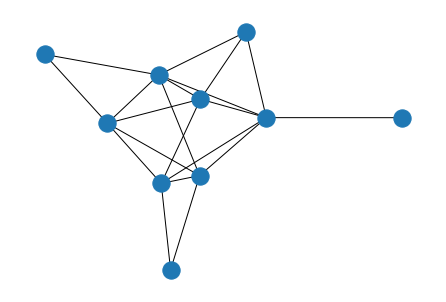

In [ ]:
n = 10
m = 20 # tiene que ser menor que n*(n-1)/2

# Con numpy 
A = np.zeros((n,n))
r,c = np.triu_indices(n,1)
ix = np.random.choice(np.arange(len(r)), m, replace=False)
r = r[ix]
c = c[ix]

A[r,c] = 1
A = A + A.T
print(A)
G = nx.from_numpy_array(A)
nx.draw(G)

Con cantidad de nodos n y conexiones con probabilidad p

[[0 1 1 0 1 1 1 1 1 1]
 [1 0 1 0 1 1 1 1 0 1]
 [1 1 0 1 1 1 1 1 1 1]
 [0 0 1 0 1 1 1 1 1 1]
 [1 1 1 1 0 1 1 1 1 1]
 [1 1 1 1 1 0 1 1 1 0]
 [1 1 1 1 1 1 0 0 0 1]
 [1 1 1 1 1 1 0 0 1 1]
 [1 0 1 1 1 1 0 1 0 1]
 [1 1 1 1 1 0 1 1 1 0]]


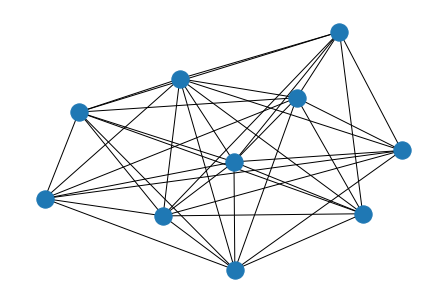

In [ ]:
# Con networkx
n = 10
p = 0.8
G = nx.erdos_renyi_graph(n, p)
print(nx.adjacency_matrix(G).todense())
nx.draw(G)

# Crear redes a partir de nubes de puntos



[0.64980184 0.5453653  0.89786196 0.15724669 0.38724664 0.59366805
 0.85097038 0.37527508 0.78422815 0.26248894]
[0.74817073 0.45279347 0.78594731 0.77620614 0.59661781 0.17731322
 0.22620626 0.66215232 0.34083737 0.71251561]


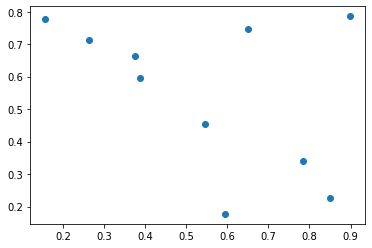

In [ ]:
n = 10
x = np.random.rand(n)
y = np.random.rand(n)
X = np.vstack([x,y]).T
plt.scatter(x,y);

print(x)
print(y)

Distancia euclídea todos con todos, método pdist de scipy

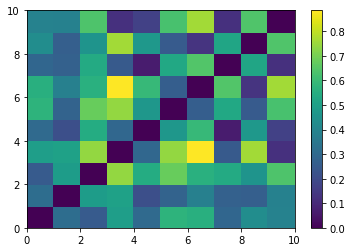

In [ ]:
from scipy.spatial.distance import pdist, squareform
C = squareform(pdist(X))

plt.pcolor(C)
plt.colorbar();

## Ejercicio: 
Dados distintos umbrales, construir redes a partir de la matriz de distancias anterior.

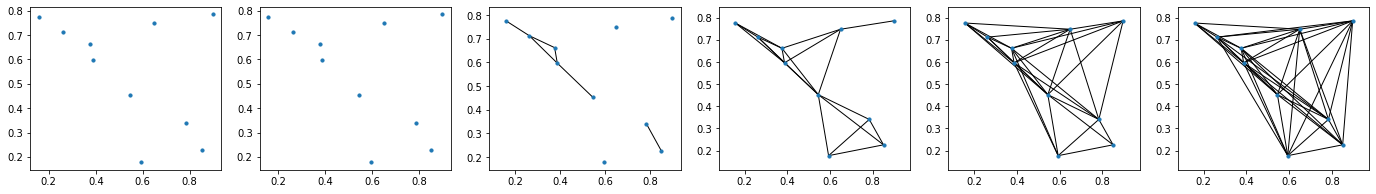

In [ ]:
pos = {i:p for i,p in enumerate(zip(x,y))}

k = 5
# k +1 porque sumamos el item distancia 0.
f, axs = plt.subplots(1, k+1, figsize=(24,3))
min_non_0 = np.min(C[np.nonzero(C)])
ee = np.concatenate( ([0], np.linspace(min_non_0, C.max() * 0.8, k)))
for i, u in enumerate(ee):
  
  # Construir matriz de adyacencia
  A = np.zeros((len(C), len(C)))
  for j in range(0, len(C)):
    for k in range(0, len(C)):
      if(j != k):
        if(C[j][k] < u):
          A[j][k] = 1
          A[k][j] = 1

  # Construir grafo 
  G = nx.from_numpy_array(A)

  # Plotear red
  nx.draw_networkx_nodes(G,pos=pos,ax=axs[i], node_size=10)
  nx.draw_networkx_edges(G,pos=pos,ax=axs[i])

  axs[i].tick_params(left=True, bottom=True, labelleft=True, labelbottom=True)

Nota: 
Si en vez de puntos que toman valores continuos en este caso en R², se tienen vectores con valores 0 o 1, una forma de medir distancia o similaridad es el producto interno entre los pares de puntos.

# Metodo de la potencia

## Ejercicio:

Implementar el método de la potencia considerando algún criterio de parada

In [ ]:
import numpy as np

def power_iteration(A, niter=100000, eps=1e-6):
    """
    b = np.random.rand(A.shape[1])
    b = b / np..linalg.norm(b)

    for i in range(niter):
      old = b
      b = A @ b
      b = b / np.linalg.norm(b)

      # Criterio de parada -> cos
      # <a, b> = |a||b|cos(angle)
      # -1 < cos(angle) < 1
      # criterio de parada adicional a niter > acelero el metodo
      # oTRO : ANGULO A*x - w*x
      
      cos_angle = np.dot(b, old)
      if (1-eps) < cos_angle <= 1:
          print(i)
          break
        
      eigenvalue = np.dot(b, A @ b)
      return eigenvalue, b
    """

    """
    Calcula el autovector al autovalor asociado de valor máximo
    Devuelve (a, v) con a autovalor, y v autovector de A
    Arguments:
    ----------
    A: np.array
        Matriz de la cual quiero calcular el autovector y autovalor
    niter: int (> 0)
        Cantidad de iteraciones
    eps: Epsilon
        Tolerancia utilizada en el criterio de parada
    """
    a = 1
    v = np.ones(A.shape[0])
    prev_v = 0
    """
    TODO: Completar el método de la potencia
    IMPORTANTE: Agreguen algún criterio de parada!
    """
    for i in range(0, niter):
      av = M.dot(v) # Av
      npv = np.linalg.norm(av)

      if(np.abs(npv - prev_v) < eps): 
        print(i)
        return a, v
      else:
        v = av / npv # v <- Bv / ||Bv||
        # v.T * Av / v.T * v
        a = (np.dot((v.T),M.dot(v))) / (np.dot(v.T, v)) # a <- vTBv / vTv
        prev_v = npv

    return a, v

Verifiquemos la implementación un ejemplo conocido:

$$
A = Q^T \begin{pmatrix}
d_1    &0     &0      &0      &\\
0      &d_2   &0      &0      &\\
\vdots &\vdots&\ddots &\vdots &\\
0      &0     &0      &d_n    & \\
\end{pmatrix} Q 
$$

con $Q = I - 2 v v^T$, $||v||_2=1$
 la matriz de reflexión que sabemos que es ortogonal

Probemos calcular el método de la potencia con esto.

In [ ]:
#@title
import numpy as np

D = np.diag([5.0, 4.0, 3.0, 2.0, 1.0])

v = np.ones((D.shape[0], 1))

v = v / np.linalg.norm(v)

# Matriz de Householder
B = np.eye(D.shape[0]) - 2 * (v @ v.T)

# Matriz a diagonalizar
M = B.T @ D @ B

#power_iteration(M, 5, 0.7)

# Metodo de la potencia + Deflación

Implementar método de la potencia + deflación

In [ ]:
#@title
def eig(A, num=2, niter=10000, eps=1e-6):
    """
    Calculamos num autovalores y autovectores usando método de la potencia+deflación
    """
    A = A.copy()
    eigenvalues = []
    eigenvectors = np.zeros((A.shape[0], num))
    for i in range(num):

      l, v = power_iteration(A)
      eigenvalues.append(l)
      eigenvectors[:, i] = v

      # Esto es vector columna -> eigenvectors[:, i]
      A = (A - l* (v @ v.T))

    return np.array(eigenvalues), eigenvectors

## Casos de prueba para "jugar"

Matriz de Householder y Matriz Diagonal.

In [ ]:
D = np.diag(range(10, 0, -1))
print(D)
v = np.ones((D.shape[0], 1))
v = v / np.linalg.norm(v)

# Matriz de Householder
B = np.eye(D.shape[0]) - 2 * (v @ v.T)

# Matriz ya diagonalizada
M = D

#@title

l, v = power_iteration(M, niter=1000, eps=1e-6)

#@title
l, v

#@title

N = 10
D = np.diag(range(N, 0, -1))

v = np.ones((D.shape[0], 1))
v = v / np.linalg.norm(v)

# Matriz de Householder
B = np.eye(D.shape[0]) - 2 * (v @ v.T)

M = B.T @ D @ B
# Para todos los eigen el ejemplo anterior de householder.
l, v = eig(M, N, niter=5_000)
print(l)

[[10  0  0  0  0  0  0  0  0  0]
 [ 0  9  0  0  0  0  0  0  0  0]
 [ 0  0  8  0  0  0  0  0  0  0]
 [ 0  0  0  7  0  0  0  0  0  0]
 [ 0  0  0  0  6  0  0  0  0  0]
 [ 0  0  0  0  0  5  0  0  0  0]
 [ 0  0  0  0  0  0  4  0  0  0]
 [ 0  0  0  0  0  0  0  3  0  0]
 [ 0  0  0  0  0  0  0  0  2  0]
 [ 0  0  0  0  0  0  0  0  0  1]]
59
59
59
59
59
59
59
59
59
59
59
[9.99999601 9.99999601 9.99999601 9.99999601 9.99999601 9.99999601
 9.99999601 9.99999601 9.99999601 9.99999601]


Otros ejemplos

In [ ]:

#@title
# CASO SIMETRICO
A = np.array([
  [ 7,  2,  -3],
  [ 2,  2,  -2],
  [-3, -2,  -2]
])
w, V = eigen(A, num=3, niter=20000, eps=1e-24)
for i in range(len(A)):
    print(i)
    print(np.allclose(A @ V[:, i], w[i] * V[:,i]))
print("Gracias teorema espectral! (ver pdf teórico)")  

#@title
# CASO (A) * (A traspuesta)
AT = A @ A.T
TA = A.T @ A
wta, VTA = eigen(AT, num=3, niter=20000, eps=1e-24)
wat, VAT = eigen(TA, num=3, niter=20000, eps=1e-24)
print("Bingo :)" if np.allclose(wat,wta) else "Bongo :(")

¿Y este? 

In [ ]:
#@title
# CASO
A = np.array([
  [7, 2, 3],
  [0, 2, 0],
  [-6, -2, -2]
])

w, V = eigen(A, num=3, niter=20000, eps=1e-24)
print("w")
print(w)
print("V")
print(V)

#@title
print(A)
for i in range(len(A)):
    print(i)
    print(np.allclose(A @ V[:, i], w[i] * V[:,i]))  

#@title
print("uso una biblioteca")
w2, V2 = LA.eig(A)
print(w2)
print(np.dot(V2[:,0],V2[:,2]))
print(np.dot(V2[:,0],V2[:,1]))
print(np.dot(V2[:,2],V2[:,1])) 

<div>
<img src="https://i.pinimg.com/564x/d6/17/5f/d6175ff06b5636c83773b74b92f7f5b8.jpg" width="200">
</div>


# Analisis de autovectores en redes

## Propiedades de la matriz L

* Es semi-definida positiva.
* Cada fila y columna suma cero.
* El vector (1, 1, 1,.... 1) está en el núcleo. Luego, la matriz es singular.
* El número de componentes conexas es igual a la dimensión del núcleo.
* La traza (suma de la diagonal) es igual a 2 * cantidad de ejes de la red subyacente.

## Ejercicio: 
Experimentar con al menos dos redes pequeñas y corroborar la propiedad 4.

Además, para cada caso sacar conclusiones sobre la centralidad de autovector (usando el de mayor autovalor) y la conectividad algebraica.


In [ ]:
# TO DO

## Ejercicio:


1.  Analizar el espectro de autovalores de la Laplaciana para redes de 10 nodos en función de su densidad de ejes. Para cada densidad, considerar el promedio y la dispersión del espectro generando varias redes aleatorias. Para mostrar los resultados del análisis recurrir a alguna representación gráfica adecuada que muestre en fucnción del parámetro relevante:


> la evolución de la magnitud de los autovalores en promedio,


> la dispersión de esas magnitudes.


2. Comparar los resultados obtenidos utilizando su implementacion del método de la potencia + deflación






Considerar [este](https://networkx.org/documentation/stable/reference/generated/networkx.linalg.spectrum.laplacian_spectrum.html
) y este [otro](https://networkx.org/documentation/networkx-1.10/reference/generated/networkx.generators.random_graphs.erdos_renyi_graph.html) método para conseguir el espectro



In [ ]:
ls  = []
rep = 50 # cantidad repeticiones
n = 10.  # cantidad de nodos
rp = 50. # cantidad de densidades

for p in np.linspace(0,1, rp):
  l = np.zeros(n)
  for r in range(rep):
    ## genero una rede de n nodos con una densidad que depende de p.
    Gx = ... #TO DO
    ne = Gx.number_of_edges()
    # guardo los autovalores.
    l = ... #TO DO
    ls.append( l )

## Generar figura en función de lo pedido y la información acmulada en el paso previo.

# PCA y reconstrucción de rostros

In [ ]:
from pathlib import Path
import pandas as pd
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
### TODO
### --> completar con la URL que se pase en clase .!wget 

In [ ]:
X = pd.read_csv('caras.csv').values
X.shape

In [ ]:
h,w = 112//2, 92//2

In [ ]:
f, axs = plt.subplots(10,10, figsize=(24,24))
for i, ax in enumerate(axs.flatten()):
  ax.imshow(X[i].reshape(h,w), cmap=plt.cm.gray);
  ax.axis('off')
plt.tight_layout()

In [ ]:
Xcentered = X - X.mean(0)
l, V = np.linalg.eigh(Xcentered.T@Xcentered)

Notar que V son los autovectores de la matriz de covarianza puestos como columnas. La función los devuelve ordenados de manera ascendente.

In [ ]:
V.shape

¿Qué pinta tienen los autovectores de la matriz de covarianza?

In [ ]:
f, axs = plt.subplots(5,5, figsize=(12,12))
for i, ax in enumerate(axs.flatten()):
  ax.imshow(V[:,-i-1].reshape(h,w), cmap=plt.cm.gray);
  ax.axis('off')
plt.tight_layout()

Comparemos lo que obvtuvinos con los resultados segun el pca de sklearn

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca = PCA(50).fit(X)

In [ ]:
pca.components_.shape

In [ ]:
f, axs = plt.subplots(10,5, figsize=(12,12))
for i, ax in enumerate(axs.flatten()):
  ax.imshow(pca.components_[i].reshape(h,w), cmap=plt.cm.gray);
  ax.axis('off')
plt.tight_layout()

Más componentes más se explica la varianza total, con 50 ya se llega al 95% aprox

In [ ]:
plt.plot(np.cumsum(pca.explained_variance_ratio_));

Conseguimos las coordenadas de las 50 componentes principales (eigenfaces). 

In [ ]:
Z = pca.transform(X)

Ahora podemos expresar cualquier cara como una combinación lineal de las eigenfaces anteriores. Veamos que tan bien resulta la aproximación con una mera inspección visual.

## Ejercicio: 
Aproximar las caras del dataset utilizando 50 componentes principales


In [ ]:
# TO DO


In [ ]:
C = Xcentered @ Xcentered.T /2576/255/255

In [ ]:
C.shape

Producto interno entre cada par de imágenes. Se ve estructura de bloques porque se repite la persona en grupos de 10 imágenes

In [ ]:
plt.figure(figsize=(12,12))
plt.pcolor(C);
plt.colorbar();